### <font color='red'> Project 3 : Buzz Prediction on Twitter

Project Description:
- Use same datasets as Project 2.
- Run all the models only on 10% data. Use code given in Project 2 for sampling.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply four voting classifiers - two with hard voting and two with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project3_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project3_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project3_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import mglearn
%matplotlib inline
n_jobs=16

In [5]:
data = pd.read_csv('Twitter.data',header = None)

In [6]:
data.columns = ['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6',
               'AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3',
                'BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1',
               'AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6',
               'AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0',
               'ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','Target']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583250 entries, 0 to 583249
Data columns (total 78 columns):
NCD_0        583250 non-null int64
NCD_1        583250 non-null int64
NCD_2        583250 non-null int64
NCD_3        583250 non-null int64
NCD_4        583250 non-null int64
NCD_5        583250 non-null int64
NCD_6        583250 non-null int64
AI_0         583250 non-null int64
AI_1         583250 non-null int64
AI_2         583250 non-null int64
AI_3         583250 non-null int64
AI_4         583250 non-null int64
AI_5         583250 non-null int64
AI_6         583250 non-null int64
AS(NA)_0     583250 non-null float64
AS(NA)_1     583250 non-null float64
AS(NA)_2     583250 non-null float64
AS(NA)_3     583250 non-null float64
AS(NA)_4     583250 non-null float64
AS(NA)_5     583250 non-null float64
AS(NA)_6     583250 non-null float64
BL_0         583250 non-null float64
BL_1         583250 non-null float64
BL_2         583250 non-null float64
BL_3         583250 non-null 

In [8]:
data.isnull().sum()

NCD_0       0
NCD_1       0
NCD_2       0
NCD_3       0
NCD_4       0
NCD_5       0
NCD_6       0
AI_0        0
AI_1        0
AI_2        0
AI_3        0
AI_4        0
AI_5        0
AI_6        0
AS(NA)_0    0
AS(NA)_1    0
AS(NA)_2    0
AS(NA)_3    0
AS(NA)_4    0
AS(NA)_5    0
AS(NA)_6    0
BL_0        0
BL_1        0
BL_2        0
BL_3        0
BL_4        0
BL_5        0
BL_6        0
NAC_0       0
NAC_1       0
           ..
CS_6        0
AT_0        0
AT_1        0
AT_2        0
AT_3        0
AT_4        0
AT_5        0
AT_6        0
NA_0        0
NA_1        0
NA_2        0
NA_3        0
NA_4        0
NA_5        0
NA_6        0
ADL_0       0
ADL_1       0
ADL_2       0
ADL_3       0
ADL_4       0
ADL_5       0
ADL_6       0
NAD_0       0
NAD_1       0
NAD_2       0
NAD_3       0
NAD_4       0
NAD_5       0
NAD_6       0
Target      0
Length: 78, dtype: int64

In [9]:
data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Target
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,...,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,...,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,...,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091296,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


In [10]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [11]:
from sklearn.model_selection import train_test_split
_, sample_data, _, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)

In [12]:
sample_data.shape

(58325, 77)

In [13]:
sample_target.shape

(58325,)

In [14]:
X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data, sample_target, random_state = 0)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

C:\Users\keeps\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [39]:
X_test

array([[3.44993231e-03, 3.72818166e-03, 4.95908753e-03, ...,
        1.49241356e-03, 1.45416841e-03, 2.93048053e-03],
       [9.60740644e-04, 3.38925606e-04, 3.89642591e-04, ...,
        1.79642373e-04, 3.66703337e-04, 7.76753875e-04],
       [2.40185161e-03, 8.89679715e-04, 6.37596968e-04, ...,
        5.11289832e-04, 5.43732534e-04, 1.51820076e-03],
       ...,
       [2.13983143e-03, 1.48279953e-03, 9.56395452e-04, ...,
        7.87662715e-04, 8.21921273e-04, 1.20043781e-03],
       [2.88222193e-03, 2.88086765e-03, 3.18798484e-03, ...,
        2.16952713e-03, 1.65648749e-03, 4.16622533e-03],
       [0.00000000e+00, 4.23657007e-05, 0.00000000e+00, ...,
        1.38186441e-05, 0.00000000e+00, 7.06139886e-05]])

In [30]:
report_table = []

## BAGGING

###  1. KNN Using Bagging

In [49]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors = 3)
from sklearn.metrics import r2_score

bagging_knn = BaggingRegressor(model_knn, n_estimators = 100, max_samples = 1000, max_features = 77, bootstrap = True,n_jobs = n_jobs)
bagging_knn.fit(X_train,y_train)

train_MSE = mean_squared_error(y_train, bagging_knn.predict(X_train))
test_MSE = mean_squared_error(y_test, bagging_knn.predict(X_test))
print('Train score: {:.2f}'.format(bagging_knn.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bagging_knn.score(X_test, y_test)))

Train score: 0.77
Test score: 0.58


### 2. Decision Tree Using Bagging

In [33]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(max_depth= 10,random_state=0)
from sklearn.metrics import r2_score

bagging_dt = BaggingRegressor(model_dt, n_estimators = 500, max_features = 50, bootstrap = True, n_jobs=n_jobs, random_state=0)
bagging_dt.fit(X_train, y_train)

train_MSE = mean_squared_error(y_train, bagging_dt.predict(X_train))
test_MSE = mean_squared_error(y_test, bagging_dt.predict(X_test))
print('Train score: {:.2f}'.format(bagging_dt.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bagging_dt.score(X_test, y_test)))

Train score: 0.98
Test score: 0.84


## Pasting

### 1. KNN using Pasting

In [34]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor()
from sklearn.metrics import r2_score

pasting_knn = BaggingRegressor(model_knn, n_estimators = 100, max_samples = 1000, max_features = 77, bootstrap = False)
pasting_knn.fit(X_train,y_train)

train_MSE = mean_squared_error(y_train, pasting_knn.predict(X_train))
test_MSE = mean_squared_error(y_test, pasting_knn.predict(X_test))
print('Train score: {:.2f}'.format(pasting_knn.score(X_train, y_train)))
print('Test score: {:.2f}'.format(pasting_knn.score(X_test, y_test)))

Train score: 0.73
Test score: 0.53


### 2. SVM using Pasting

In [35]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import LinearSVR
model_svm = LinearSVR(C = 1000, random_state=0)
from sklearn.metrics import r2_score

pasting_svm = BaggingRegressor(model_svm, n_estimators = 100, max_samples = 1000, max_features = 77, bootstrap = False)
pasting_svm.fit(X_train,y_train)

train_MSE = mean_squared_error(y_train, pasting_svm.predict(X_train))
test_MSE = mean_squared_error(y_test, pasting_svm.predict(X_test))
print('Train score: {:.2f}'.format(pasting_svm.score(X_train, y_train)))
print('Test score: {:.2f}'.format(pasting_svm.score(X_test, y_test)))

Train score: 0.93
Test score: 0.95


## AdaBoost

### 1. Adaboosting using Decision Tree 

In [41]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(max_depth= 10)
from sklearn.metrics import r2_score

adaboost_dt = AdaBoostRegressor(model_dt, n_estimators=200, loss='linear', learning_rate=0.5, random_state=0)
adaboost_dt.fit(X_train, y_train)

train_MSE = mean_squared_error(y_train, adaboost_dt.predict(X_train))
test_MSE = mean_squared_error(y_test, adaboost_dt.predict(X_test))
print('Train score: {:.2f}'.format(adaboost_dt.score(X_train, y_train)))
print('Test score: {:.2f}'.format(adaboost_dt.score(X_test, y_test)))

Train score: 0.98
Test score: 0.87


### 2. Adaboosting Using Linear Regression

In [46]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
model_lreg = LinearRegression()
from sklearn.metrics import r2_score

adaboost_lreg = AdaBoostRegressor(model_lreg, n_estimators=200, loss='linear', learning_rate=0.5, random_state=0)
adaboost_lreg.fit(X_train, y_train)

train_MSE = mean_squared_error(y_train, adaboost_lreg.predict(X_train))
test_MSE = mean_squared_error(y_test, adaboost_lreg.predict(X_test))
print('Train score: {:.2f}'.format(adaboost_lreg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(adaboost_lreg.score(X_test, y_test)))

Train score: 0.71
Test score: 0.76


## Gradient Boosting

In [48]:
from  sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=1, n_estimators=200, learning_rate=0.5, random_state=0)
gbrt.fit(X_train, y_train)

train_MSE = mean_squared_error(y_train, gbrt.predict(X_train))
test_MSE = mean_squared_error(y_test, gbrt.predict(X_test))
print('Train score: {:.2f}'.format(gbrt.score(X_train, y_train)))
print('Test score: {:.2f}'.format(gbrt.score(X_test, y_test)))

Train score: 0.96
Test score: 0.85


## PCA

In [50]:
X_scaled = scaler.fit_transform(sample_data)
X_scaled.shape

(58325, 77)

In [51]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [52]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.98) + 1
d

8

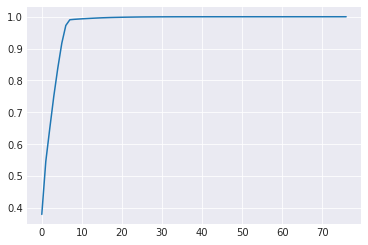

In [53]:
sns.set_style("darkgrid")
plt.plot(cumsum)
plt.show()

In [54]:
pca = PCA(n_components = 8)
X_reduced = pca.fit_transform(X_scaled)

In [55]:
X_reduced.shape

(58325, 8)

In [56]:
X_pca = X_reduced

In [57]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,sample_target,random_state=0)

## KNN with PCA

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
model_KNN = KNeighborsRegressor()
param_KNN = {'n_neighbors':[1, 5, 10, 15, 20]}
print("Parameter grid:\n{}".format(param_KNN))
grid_KNN = GridSearchCV(model_KNN, param_grid = param_KNN, cv=5, return_train_score=True, n_jobs=n_jobs)

Parameter grid:
{'n_neighbors': [1, 5, 10, 15, 20]}


In [59]:
grid_KNN.fit(X_train_pca,y_train_pca)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=16,
       param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

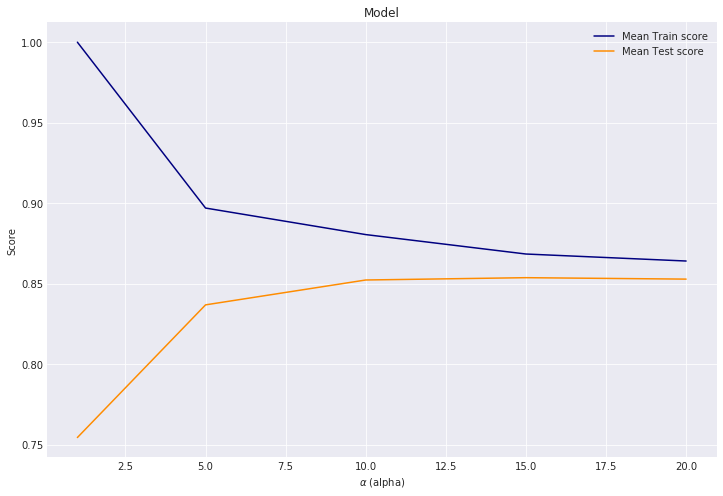

In [60]:
nearest_neighbours = [1, 5, 10, 15, 20]

train_scores_mean = grid_KNN.cv_results_["mean_train_score"]
train_scores_std = grid_KNN.cv_results_["std_train_score"]
test_scores_mean = grid_KNN.cv_results_["mean_test_score"]
test_scores_std = grid_KNN.cv_results_["std_test_score"]

plt.figure(figsize = (12,8))
plt.title('Model')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')
# plot train scores
plt.plot(nearest_neighbours, train_scores_mean, label='Mean Train score',
             color='navy')
# create a shaded area between [mean - std, mean + std]
#plt.gca().fill_between(nearest_neighbours,
                       #train_scores_mean - train_scores_std,
                       #train_scores_mean + train_scores_std,
                       #alpha=0.2,
                       #color='navy')
plt.plot(nearest_neighbours, test_scores_mean,
             label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
#plt.gca().fill_between(nearest_neighbours,
                       #test_scores_mean - test_scores_std,
                       #test_scores_mean + test_scores_std,
                       #alpha=0.2,
                       #color='darkorange')
plt.legend(loc='best')
plt.show()

In [61]:
print("Best cross-validation score: {:.2f}".format(grid_KNN.best_score_))
print("Best parameters: {}".format(grid_KNN.best_params_))
print("Training Score: {}".format(grid_KNN.score(X_train_pca, y_train_pca)))
print("Testing Score: {}".format(grid_KNN.score(X_test_pca, y_test_pca)))

Best cross-validation score: 0.85
Best parameters: {'n_neighbors': 15}
Training Score: 0.8704739233492735
Testing Score: 0.7138445925533325


In [62]:
report_table.append({'Model_name':'KNN',
                    'Paramater':grid_KNN.best_params_,
                    'Training_score':grid_KNN.score(X_train_pca, y_train_pca),
                    'Test Score':grid_KNN.score(X_test_pca, y_test_pca)
                    })

## Linear Regression with PCA

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
lreg = LinearRegression()

In [64]:
scores = cross_val_score(lreg, X_train_pca, y_train_pca, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Train Score {:.2f}".format(scores.mean()))
lreg.fit(X_train_pca, y_train_pca)
test_score = lreg.score(X_test_pca,y_test_pca) 
print("Test Score {:.2f}".format(test_score))

Cross-validation scores: [0.86441121 0.82916616 0.80810196 0.88167567 0.88103765]
Train Score 0.85
Test Score 0.83


In [65]:
report_table.append({'Model_name':'LinearRegression',
                    'Paramater':'No Parameter',
                    'Training_score': scores.mean(),
                    'Test Score':test_score})

## SGD with PCA

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
param_SGD = {'max_iter': [10, 100, 1000],'learning_rate':['optimal'], 'penalty' :['l1','l2'],'random_state':[0]}
print("Parameter grid:\n{}".format(param_SGD))
grid_SGD = GridSearchCV(estimator = SGDRegressor(), param_grid = param_SGD, cv=5, return_train_score=True,n_jobs=n_jobs)

Parameter grid:
{'max_iter': [10, 100, 1000], 'learning_rate': ['optimal'], 'penalty': ['l1', 'l2'], 'random_state': [0]}


In [67]:
grid_SGD.fit(X_train_pca, y_train_pca)

GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=16,
       param_grid={'max_iter': [10, 100, 1000], 'learning_rate': ['optimal'], 'penalty': ['l1', 'l2'], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [68]:
print("CV result: {}".format(grid_SGD.cv_results_['mean_test_score']))
#print("Best cross-validation score: {:.2f}".format(grid_SGD.best_score_))
print("Best parameters: {}".format(grid_SGD.best_params_))
print("Training Score: {}".format(grid_SGD.score(X_train_pca, y_train_pca)))
print("Testing Score: {}".format(grid_SGD.score(X_test_pca, y_test_pca)))

CV result: [0.85032826 0.8504604  0.8517063  0.85199841 0.85279957 0.85295123]
Best parameters: {'learning_rate': 'optimal', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 0}
Training Score: 0.8517507232913657
Testing Score: 0.8333978358292539


In [69]:
report_table.append({'Model_name':'SGDReg',
                    'Paramater':grid_SGD.best_params_,
                    'Training_score': grid_SGD.score(X_train_pca, y_train_pca),
                    'Test Score':grid_SGD.score(X_test_pca, y_test_pca)})

## Polynomial With PCA

In [70]:
from sklearn.preprocessing  import PolynomialFeatures
train_score_list = []
test_score_list = []
lreg_poly = LinearRegression()

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train_pca)
    X_test_poly = poly.transform(X_test_pca)
    scores_train = cross_val_score(lreg_poly, X_train_poly, y_train_pca, cv=5)
    train_score_list.append(scores_train.mean())
    lreg_poly.fit(X_train_poly,y_train_pca)
    scores_test = lreg_poly.score(X_test_poly,y_test_pca)
    test_score_list.append(scores_test)

print(train_score_list)
print(test_score_list)

[0.8528785301375201, 0.8530261609307799]
[0.8349194455351795, 0.9138973112367501]


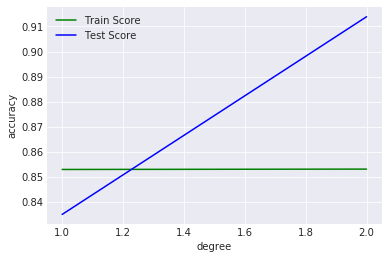

In [71]:
%matplotlib inline
x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [72]:
report_table.append({'Model_name':'PolyReg',
                    'Paramater':{'degree':1},
                    'Training_score':train_score_list[0],
                    'Test Score':test_score_list[0]
                    })

## Ridge Regression Using PCA

In [74]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
model = Ridge(random_state=0)
param_Ridge = {'alpha': np.logspace(-3, 3, 13)}
print("Parameter grid:\n{}".format(param_Ridge))
grid_Ridge = GridSearchCV(estimator = model,param_grid = param_Ridge, cv=5, return_train_score=True,scoring='r2',n_jobs=n_jobs)

Parameter grid:
{'alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])}


In [75]:
grid_Ridge.fit(X_train_pca, y_train_pca)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=16,
       param_grid={'alpha': array([1.00000e-03, 3.16228e-03, 1.00000e-02, 3.16228e-02, 1.00000e-01,
       3.16228e-01, 1.00000e+00, 3.16228e+00, 1.00000e+01, 3.16228e+01,
       1.00000e+02, 3.16228e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

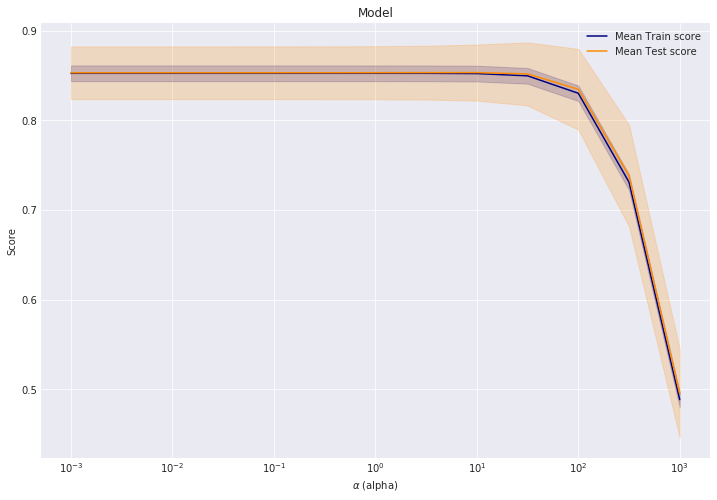

In [76]:
alphas = np.logspace(-3, 3, 13)

train_scores_mean = grid_Ridge.cv_results_["mean_train_score"]
train_scores_std = grid_Ridge.cv_results_["std_train_score"]
test_scores_mean = grid_Ridge.cv_results_["mean_test_score"]
test_scores_std = grid_Ridge.cv_results_["std_test_score"]

plt.figure(figsize = (12,8))
plt.title('Model')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')
# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Train score',
             color='navy')
# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2,
                       color='navy')
plt.semilogx(alphas, test_scores_mean,
             label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')
plt.show()

In [77]:
print("Best cross-validation score: {:.2f}".format(grid_Ridge.best_score_))
print("Best parameters: {}".format(grid_Ridge.best_params_))
print("Training Score: {}".format(grid_Ridge.score(X_train_pca, y_train_pca)))
print("Testing Score: {}".format(grid_Ridge.score(X_test_pca, y_test_pca)))

Best cross-validation score: 0.85
Best parameters: {'alpha': 10.0}
Training Score: 0.8516010437021877
Testing Score: 0.8314918656585073


In [78]:
report_table.append({'Model_name':'Ridge',
                    'Paramater':grid_Ridge.best_params_,
                    'Training_score':grid_Ridge.score(X_train_pca, y_train_pca),
                    'Test Score':grid_Ridge.score(X_test_pca, y_test_pca)
                    })

## Lasso With PCA

In [79]:
import warnings
warnings.filterwarnings('ignore')

In [80]:
from  sklearn.linear_model import Lasso
model_Lasso = Lasso(random_state=0)
param_Lasso = {'alpha': np.logspace(-3, 3, 13)}
print("Parameter grid:\n{}".format(param_Lasso))
grid_Lasso = GridSearchCV(model_Lasso, param_grid = param_Lasso, cv=5, return_train_score=True, n_jobs=n_jobs)

Parameter grid:
{'alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])}


In [81]:
grid_Lasso.fit(X_train_pca, y_train_pca)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=16,
       param_grid={'alpha': array([1.00000e-03, 3.16228e-03, 1.00000e-02, 3.16228e-02, 1.00000e-01,
       3.16228e-01, 1.00000e+00, 3.16228e+00, 1.00000e+01, 3.16228e+01,
       1.00000e+02, 3.16228e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

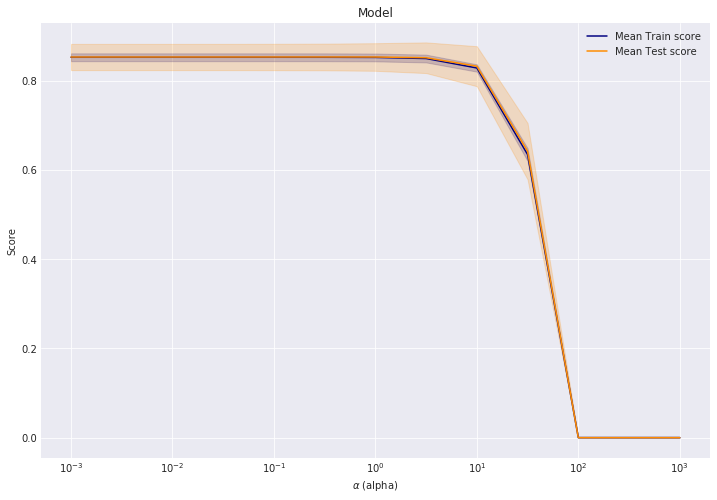

In [82]:
alphas = np.logspace(-3, 3, 13)

train_scores_mean = grid_Lasso.cv_results_["mean_train_score"]
train_scores_std = grid_Lasso.cv_results_["std_train_score"]
test_scores_mean = grid_Lasso.cv_results_["mean_test_score"]
test_scores_std = grid_Lasso.cv_results_["std_test_score"]

plt.figure(figsize = (12,8))
plt.title('Model')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')
# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Train score',
             color='navy')
# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2,
                       color='navy')
plt.semilogx(alphas, test_scores_mean,
             label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')
plt.show()

In [83]:
print("Best cross-validation score: {:.2f}".format(grid_Lasso.best_score_))
print("Best parameters: {}".format(grid_Lasso.best_params_))
print("Training Score: {}".format(grid_Lasso.score(X_train_pca, y_train_pca)))
print("Testing Score: {}".format(grid_Lasso.score(X_test_pca, y_test_pca)))

Best cross-validation score: 0.85
Best parameters: {'alpha': 0.31622776601683794}
Training Score: 0.8517587404045909
Testing Score: 0.8338203013954705


In [84]:
report_table.append({'Model_name':'Lasso',
                    'Paramater':grid_Lasso.best_params_,
                    'Training_score':grid_Lasso.score(X_train_pca, y_train_pca),
                    'Test Score':grid_Lasso.score(X_test_pca, y_test_pca)
                    })

## SVM with Linear Kernel

In [85]:
from sklearn.svm import LinearSVR
model_Linear_SVM = LinearSVR(random_state=0)
param_Linear_SVM = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_Linear_SVM))
grid_Linear_SVM = GridSearchCV(model_Linear_SVM, param_grid = param_Linear_SVM, cv=5, return_train_score=True,n_jobs=n_jobs)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [86]:
grid_Linear_SVM.fit(X_train_pca, y_train_pca)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=0, tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=16,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

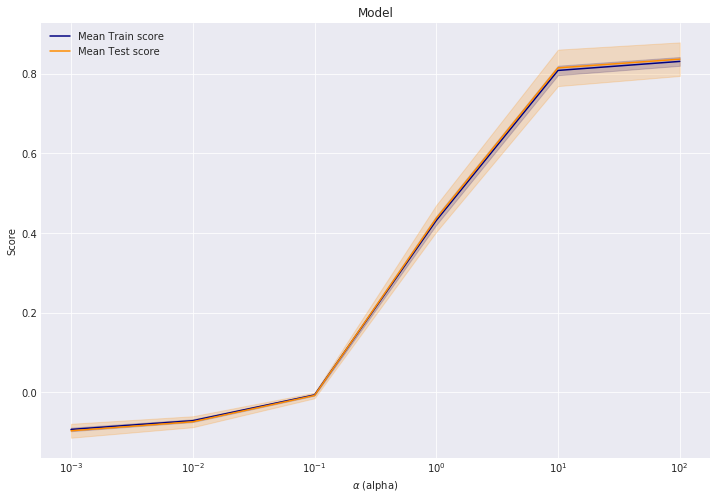

In [87]:
C = [0.001, 0.01, 0.1, 1, 10, 100]

train_scores_mean = grid_Linear_SVM.cv_results_["mean_train_score"]
train_scores_std = grid_Linear_SVM.cv_results_["std_train_score"]
test_scores_mean = grid_Linear_SVM.cv_results_["mean_test_score"]
test_scores_std = grid_Linear_SVM.cv_results_["std_test_score"]

plt.figure(figsize = (12,8))
plt.title('Model')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')
# plot train scores
plt.semilogx(C, train_scores_mean, label='Mean Train score',
             color='navy')
# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(C,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2,
                       color='navy')
plt.semilogx(C, test_scores_mean,
             label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(C,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')
plt.show()

In [88]:
print("Best cross-validation score: {:.2f}".format(grid_Linear_SVM.best_score_))
print("Best parameters: {}".format(grid_Linear_SVM.best_params_))
print("Training Score: {}".format(grid_Linear_SVM.score(X_train_pca, y_train_pca)))
print("Testing Score: {}".format(grid_Linear_SVM.score(X_test_pca, y_test_pca)))

Best cross-validation score: 0.84
Best parameters: {'C': 100}
Training Score: 0.8309876964297753
Testing Score: 0.786654566279616


In [89]:
report_table.append({'Model_name':'LinearSVR',
                    'Paramater':grid_Linear_SVM.best_params_,
                    'Training_score':grid_Linear_SVM.score(X_train_pca, y_train_pca),
                    'Test Score':grid_Linear_SVM.score(X_test_pca, y_test_pca)
                    })

## SVM with Radial Kernel

In [108]:
from sklearn.svm import SVR
model_Radial_SVM = SVR(C= 100, gamma = 0.1, kernel = 'rbf')

In [109]:
model_Radial_SVM.fit(X_train_pca, y_train_pca)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [113]:
print("Training Score: {}".format(model_Radial_SVM.score(X_train_pca, y_train_pca)))
print("Testing Score: {}".format(model_Radial_SVM.score(X_test_pca, y_test_pca)))

Training Score: 0.7664659612396879
Testing Score: 0.506206079481053


In [114]:
report_table.append({'Model_name':'RadialKernel',
                    'Paramater':'C:100,gamma:0.1',
                    'Training_score':model_Radial_SVM.score(X_train_pca, y_train_pca),
                    'Test Score':model_Radial_SVM.score(X_test_pca, y_test_pca)
                    })

## SVM with Polynomial Kernel

In [128]:
model_Poly_SVM = SVR(kernel = 'poly', degree = 2, C= 100)

In [129]:
model_Poly_SVM.fit(X_train_pca, y_train_pca)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [130]:
print("Training Score: {}".format(model_Poly_SVM.score(X_train_pca, y_train_pca)))
print("Testing Score: {}".format(model_Poly_SVM.score(X_test_pca, y_test_pca)))

Training Score: 0.38192708143684095
Testing Score: 0.5826335153748621


In [131]:
report_table.append({'Model_name':'PolyKernel',
                    'Paramater':'degree:2, C:100',
                    'Training_score':model_Poly_SVM.score(X_train_pca, y_train_pca),
                    'Test Score':model_Poly_SVM.score(X_test_pca, y_test_pca)
                    })

In [132]:
report = pd.DataFrame(report_table)
report.set_index('Model_name', inplace = True)

## Model Performance Report with PCA

In [133]:
report

,Paramater,Test Score,Training_score
Model_name,,,
KNN,{'n_neighbors': 15},0.713845,0.870474
LinearRegression,No Parameter,0.834919,0.852879
SGDReg,"{'learning_rate': 'optimal', 'max_iter': 1000,...",0.833398,0.851751
PolyReg,{'degree': 1},0.834919,0.852879
Ridge,{'alpha': 10.0},0.831492,0.851601
Lasso,{'alpha': 0.31622776601683794},0.833820,0.851759
LinearSVR,{'C': 100},0.786655,0.830988
RadialKernel,"C:100,gamma:0.1",0.506206,0.766466
PolyKernel,"degree:2, C:100",0.582634,0.381927


## Report from Project -2 ( Without PCA)

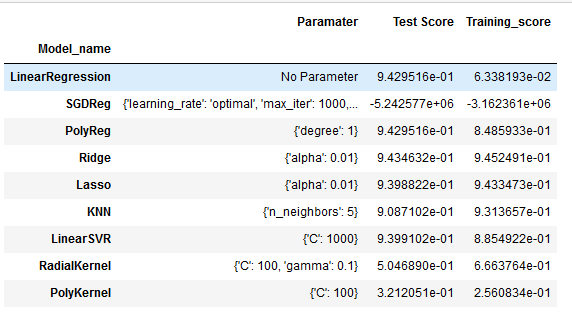

In [52]:
from IPython.display import Image
Image(filename='image.PNG')

## ###  As we can see from the two reports, for most models the train and test r2 score  is reduced when applied on the PCA transformed data. This can be attributed to the fact that, we have taken only 8 principal componets that explain only 98% variance of the original dataset. So resulting 2% variance loss is causing the models to have a slight decrease in  accuracy. 

In [16]:
import tensorflow as tf

In [17]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(10)

In [47]:
# create model
model = Sequential()
model.add(Dense(100, input_dim=77, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

In [48]:
# Compile model
model.compile(loss='mse', optimizer='adam' , metrics = ['mse'])

In [49]:
model.fit(X_train, y_train, epochs = 500, batch_size = 150)

Epoch 1/500
43743/43743 [==============================] - 1s 31us/step - loss: 355980.7616 - mean_squared_error: 355980.7616
Epoch 2/500
43743/43743 [==============================] - 1s 18us/step - loss: 71507.4529 - mean_squared_error: 71507.4529
Epoch 3/500
43743/43743 [==============================] - 1s 18us/step - loss: 59664.2252 - mean_squared_error: 59664.2252
Epoch 4/500
43743/43743 [==============================] - 1s 18us/step - loss: 58952.0630 - mean_squared_error: 58952.0630
Epoch 5/500
43743/43743 [==============================] - 1s 18us/step - loss: 56030.7601 - mean_squared_error: 56030.7601
Epoch 6/500
43743/43743 [==============================] - 1s 18us/step - loss: 55722.5523 - mean_squared_error: 55722.5523
Epoch 7/500
43743/43743 [==============================] - 1s 18us/step - loss: 54111.6101 - mean_squared_error: 54111.6101
Epoch 8/500
43743/43743 [==============================] - 1s 18us/step - loss: 52990.6156 - mean_squared_error: 52990.6156
Epoch 

43743/43743 [==============================] - 1s 18us/step - loss: 18896.4631 - mean_squared_error: 18896.4631
Epoch 132/500
43743/43743 [==============================] - 1s 18us/step - loss: 18959.0071 - mean_squared_error: 18959.0071
Epoch 133/500
43743/43743 [==============================] - 1s 18us/step - loss: 18817.1889 - mean_squared_error: 18817.1889
Epoch 134/500
43743/43743 [==============================] - 1s 18us/step - loss: 19075.1232 - mean_squared_error: 19075.1232
Epoch 135/500
43743/43743 [==============================] - 1s 18us/step - loss: 18674.7553 - mean_squared_error: 18674.7553
Epoch 136/500
43743/43743 [==============================] - 1s 18us/step - loss: 19475.0531 - mean_squared_error: 19475.0531
Epoch 137/500
43743/43743 [==============================] - 1s 18us/step - loss: 19341.2613 - mean_squared_error: 19341.2613
Epoch 138/500
43743/43743 [==============================] - 1s 18us/step - loss: 18890.6482 - mean_squared_error: 18890.6482
Epoch 

43743/43743 [==============================] - 1s 18us/step - loss: 18229.0845 - mean_squared_error: 18229.0845
Epoch 259/500
43743/43743 [==============================] - 1s 18us/step - loss: 18381.6460 - mean_squared_error: 18381.6460
Epoch 260/500
43743/43743 [==============================] - 1s 18us/step - loss: 18553.2151 - mean_squared_error: 18553.2151
Epoch 261/500
43743/43743 [==============================] - 1s 18us/step - loss: 18731.4009 - mean_squared_error: 18731.4009
Epoch 262/500
43743/43743 [==============================] - 1s 18us/step - loss: 18360.1904 - mean_squared_error: 18360.1904
Epoch 263/500
43743/43743 [==============================] - 1s 19us/step - loss: 18381.3078 - mean_squared_error: 18381.3078
Epoch 264/500
43743/43743 [==============================] - 1s 18us/step - loss: 18271.0482 - mean_squared_error: 18271.0482
Epoch 265/500
43743/43743 [==============================] - 1s 18us/step - loss: 18478.4183 - mean_squared_error: 18478.4183
Epoch 

43743/43743 [==============================] - 1s 18us/step - loss: 17974.4911 - mean_squared_error: 17974.4911
Epoch 388/500
43743/43743 [==============================] - 1s 18us/step - loss: 17927.9728 - mean_squared_error: 17927.9728
Epoch 389/500
43743/43743 [==============================] - 1s 18us/step - loss: 17639.9024 - mean_squared_error: 17639.9024
Epoch 390/500
43743/43743 [==============================] - 1s 18us/step - loss: 17681.6525 - mean_squared_error: 17681.6525
Epoch 391/500
43743/43743 [==============================] - 1s 18us/step - loss: 17787.8570 - mean_squared_error: 17787.8570
Epoch 392/500
43743/43743 [==============================] - 1s 18us/step - loss: 17856.1038 - mean_squared_error: 17856.1038
Epoch 393/500
43743/43743 [==============================] - 1s 18us/step - loss: 17671.5218 - mean_squared_error: 17671.5218
Epoch 394/500
43743/43743 [==============================] - 1s 18us/step - loss: 18362.2612 - mean_squared_error: 18362.2612
Epoch 

In [50]:
model.evaluate(X_test, y_test)

14582/14582 [==============================] - 0s 28us/step


[14309.760990262637, 14309.760990262637]

In [51]:
from sklearn.metrics import r2_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: 0.96
Test score: 0.96
